# lprun test

In [1]:
%load_ext line_profiler

In [2]:
import numpy as np
import pandas as pd

In [3]:
origin = {'lat': 34, 'lon': -120}
np.random.seed(1)
n = 100000
changes = np.random.randn(n, 2) / 30
changes[0] = [0, 0]
trace = pd.DataFrame.from_records(changes, columns=['lat', 'lon']).cumsum()
trace['lat'] += origin['lat']
trace['lon'] += origin['lon']

trace.head()

,lat,lon
0,34.000000,-120.000000
1,33.982394,-120.035766
2,34.011241,-120.112484
3,34.069402,-120.137857
4,34.080036,-120.146169


In [4]:
from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in lat/lon)
    """
    # convert to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    earth_radius = 6367
    distance_km = earth_radius * c
    return distance_km

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False

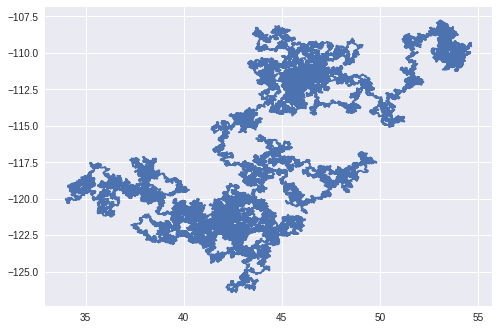

In [6]:
plt.plot(trace.lat, trace.lon)

In [7]:
def get_distances(trace, origin):
    distances = {}
    for i in trace.index:
        distances[i] = haversine(trace['lat'].loc[i], trace['lon'].loc[i], origin['lat'], origin['lon'])
    distances = pd.Series(distances)
    return distances

def get_farthest(trace, origin):
    distance = get_distances(trace, origin)
    max_idx = distance.argmax()
    return trace.loc[max_idx], distance.loc[max_idx]

In [8]:
get_farthest(trace, origin)

(lat     54.648484
 lon   -109.343278
 Name: 97647, dtype: float64, 2439.5707960599893)

In [9]:
%timeit get_farthest(trace, origin)

1 loop, best of 3: 10.8 s per loop


In [10]:
%lprun -f get_farthest get_farthest(trace, origin)